In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

In [3]:
# diff = "nodiff"
diff="5percent"


nubb_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_1bar_{diff}_reco.h5",  "meta")
nubb_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_5bar_{diff}_reco.h5",  "meta")
nubb_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_10bar_{diff}_reco.h5", "meta")
nubb_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_15bar_{diff}_reco.h5", "meta")
display(nubb_meta_1bar)
display(nubb_meta_5bar)

Tl_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_1bar_{diff}_reco.h5",  "meta")
Tl_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_5bar_{diff}_reco.h5",  "meta")
Tl_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_10bar_{diff}_reco.h5", "meta")
Tl_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_15bar_{diff}_reco.h5", "meta")
display(Tl_meta_1bar)
display(Tl_meta_15bar)

Bi_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_1bar_{diff}_reco.h5",  "meta")
Bi_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_5bar_{diff}_reco.h5",  "meta")
Bi_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_10bar_{diff}_reco.h5", "meta")
Bi_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_15bar_{diff}_reco.h5", "meta")
display(Bi_meta_1bar)
display(Bi_meta_15bar)


Bkg_meta_1bar  = pd.concat([Tl_meta_1bar,  Bi_meta_1bar])
Bkg_meta_5bar  = pd.concat([Tl_meta_5bar,  Bi_meta_5bar])
Bkg_meta_10bar = pd.concat([Tl_meta_10bar, Bi_meta_10bar])
Bkg_meta_15bar = pd.concat([Tl_meta_15bar, Bi_meta_15bar])

,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,150,0,1,25,175,3206.550,2.060234,0.528755,0.293407,0.775056,0.623253,5.266055,3.737853,4.161453,4.336473,Primary
0,150,1,0,71,68,78.362,0.194861,0.194861,0.194861,0.000000,0.194861,1.462884,1.462884,0.673220,0.673220,Delta0
0,150,2,0,127,116,189.856,0.209083,0.209083,0.209083,0.000000,0.209083,2.712425,2.712425,2.131235,2.131235,Delta0
0,151,0,1,207,130,3413.310,2.306095,0.587254,0.514399,0.514611,0.496549,1.549077,2.862928,1.142463,2.143368,Primary
0,151,1,0,216,216,0.000,0.034404,0.034404,0.034404,0.034404,0.034404,0.000000,0.000000,0.000000,0.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1558,2,0,92,92,0.000,0.035102,0.035102,0.035102,0.035102,0.035102,0.000000,0.000000,0.000000,0.000000,Brem
0,1558,3,0,93,93,0.000,0.027481,0.027481,0.027481,0.027481,0.027481,0.000000,0.000000,0.000000,0.000000,Brem
0,1559,0,1,102,136,3191.800,2.040418,0.492195,0.447119,0.427623,0.676562,4.058898,2.859161,3.555938,2.195982,Primary
0,1559,1,0,83,96,41.522,0.088691,0.088691,0.088691,0.000000,0.088691,1.278977,1.278977,0.517181,0.517181,Delta0


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,150,0,1,28,6,543.214,2.455770,0.787966,0.597409,0.662884,0.454542,1.523012,1.621969,0.707247,1.081143,Primary
0,151,0,1,20,6,729.904,2.462541,0.629406,0.167275,0.586256,0.415498,2.263813,1.709756,1.463895,0.748873,Primary
0,152,0,1,2,13,455.756,2.457978,1.072635,0.528603,0.913847,0.451015,1.593604,1.691830,0.819385,0.827847,Primary
0,153,0,1,13,43,327.780,1.029582,0.435214,0.313543,0.350501,0.149502,1.480558,1.728412,1.082557,1.642436,Primary
0,153,1,0,14,14,0.000,0.026060,0.026060,0.026060,0.026060,0.026060,0.000000,0.000000,0.000000,0.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1557,1,0,28,29,46.536,0.027048,0.027048,0.027048,0.000000,0.027048,0.000000,0.000000,0.000000,0.000000,Delta0
0,1557,2,0,24,24,0.000,0.031573,0.031573,0.031573,0.031573,0.031573,0.000000,0.000000,0.000000,0.000000,Brem
0,1558,0,1,28,9,558.489,2.457581,0.641327,0.572737,0.432380,0.854569,1.915588,6.092471,1.135093,3.816660,Primary
0,1559,0,1,34,36,602.846,2.434264,0.620568,0.504869,0.565839,0.319431,1.529673,1.878062,0.813352,1.207815,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,35335000,0,1,62,121,3768.985,2.104415,0.394234,0.233449,0.792021,0.069780,1.885797,1.105025,0.948346,0.313209,Primary
0,35335000,1,0,64,64,0.000,0.067958,0.067958,0.067958,0.067958,0.067958,0.000000,0.000000,0.000000,0.000000,Brem
0,35335000,2,0,122,123,36.585,0.186231,0.186231,0.186231,0.186231,0.186231,1.728347,1.728347,0.912120,0.912120,Brem
0,35335001,0,1,192,78,3784.251,2.338891,0.522424,0.244857,0.605591,0.071707,2.190471,1.014758,1.853527,0.135424,Primary
0,35335001,1,0,49,59,37.533,0.016216,0.016216,0.016216,0.000000,0.016216,0.000000,0.000000,0.000000,0.000000,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,35300058,1,0,0,4,99.880,0.269506,0.269506,0.269506,0.269506,0.269506,1.346809,1.346809,0.548415,0.548415,Brem
0,35300059,0,1,2,29,3518.143,1.993036,0.332083,0.220918,0.172049,0.101133,1.248074,1.028706,0.597279,0.189263,Primary
0,35300059,1,0,128,128,0.000,0.002313,0.002313,0.002313,0.002313,0.002313,0.000000,0.000000,0.000000,0.000000,Brem
0,35300059,2,0,137,137,0.000,0.005226,0.005226,0.005226,0.005226,0.005226,0.000000,0.000000,0.000000,0.000000,Brem


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,1007000,0,1,15,11,135.886,1.977730,1.074372,0.412047,0.617832,0.312835,1.025441,1.107812,1.052344e-01,2.260150e-01,Primary
0,1007000,1,0,4,4,0.000,0.038439,0.038439,0.038439,0.038439,0.038439,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,1007000,2,0,2,3,31.651,0.139032,0.139032,0.139032,0.126873,0.012160,1.000000,1.000000,0.000000e+00,0.000000e+00,Brem
0,1007000,3,0,5,6,26.982,0.178225,0.178225,0.178225,0.152197,0.026028,1.000000,1.000000,0.000000e+00,0.000000e+00,Brem
0,1007000,4,0,0,1,7.074,0.266432,0.266432,0.266432,0.266432,0.266432,1.000000,1.000000,2.452235e-19,2.452235e-19,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,993058,4,0,16,16,0.000,0.200871,0.200871,0.200871,0.200871,0.200871,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,993058,5,0,13,15,16.761,0.191966,0.191966,0.191966,0.036322,0.155644,1.000000,1.000000,1.070091e-16,1.070091e-16,Brem
0,993058,6,0,0,1,11.342,0.513134,0.513134,0.513134,0.513134,0.513134,1.000000,1.000000,3.915391e-17,3.915391e-17,Brem
0,993059,0,1,4,10,211.769,2.375534,0.717302,0.340090,0.284096,0.211704,1.262789,1.048478,2.364732e-01,1.367329e-01,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,50650000,0,1,13,248,3943.362,2.359119,0.580932,0.260400,0.618124,0.121008,3.795847,1.070711,3.005594e+00,4.316483e-01,Primary
0,50650000,1,0,0,1,9.611,0.072239,0.072239,0.072239,0.072239,0.072239,1.000000,1.000000,1.347200e-16,1.347200e-16,Brem
0,50650000,2,0,2,3,7.213,0.030066,0.030066,0.030066,0.030066,0.030066,1.000000,1.000000,3.855693e-18,3.855693e-18,Brem
0,50650001,0,1,101,137,3187.212,1.927950,0.585279,0.270202,0.547979,0.159644,2.884839,1.308628,2.657598e+00,4.359017e-01,Primary
0,50650001,1,0,127,124,32.377,0.116875,0.116875,0.116875,0.000000,0.116875,1.000000,1.000000,9.065112e-17,9.065112e-17,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,1,0,0,0,0.000,0.032266,0.032266,0.032266,0.032266,0.032266,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,1100058,2,0,7,7,0.000,0.020781,0.020781,0.020781,0.020781,0.020781,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem
0,1100058,3,0,3,5,108.584,0.284763,0.284763,0.284763,0.284763,0.284763,1.514864,1.514864,7.701061e-01,7.701061e-01,Brem
0,1100059,0,1,100,149,2463.899,1.823292,0.570647,0.209747,0.642799,0.101968,1.956670,1.100400,1.547296e+00,4.439454e-01,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,5610000,0,1,12,0,254.110,2.047411,0.359263,0.124745,0.230499,0.063779,1.102239,1.000000,0.206693,7.495248e-17,Primary
0,5610000,1,0,13,13,0.000,0.001884,0.001884,0.001884,0.001884,0.001884,0.000000,0.000000,0.000000,0.000000e+00,Brem
0,5610000,2,0,14,14,0.000,0.068049,0.068049,0.068049,0.068049,0.068049,0.000000,0.000000,0.000000,0.000000e+00,Brem
0,5610000,3,0,15,15,0.000,0.100278,0.100278,0.100278,0.100278,0.100278,0.000000,0.000000,0.000000,0.000000e+00,Brem
0,5610000,4,0,16,16,0.000,0.151372,0.151372,0.151372,0.151372,0.151372,0.000000,0.000000,0.000000,0.000000e+00,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5600058,5,0,10,10,0.000,0.076399,0.076399,0.076399,0.076399,0.076399,0.000000,0.000000,0.000000,0.000000e+00,Brem
0,5600058,6,0,11,12,33.561,0.227778,0.125854,0.101923,0.125854,0.101923,1.000000,1.000000,0.000000,0.000000e+00,Brem
0,5600059,0,1,2,10,105.887,2.086964,1.120322,0.298640,1.016989,0.006651,1.175831,1.022632,0.266286,1.009689e-01,Primary
0,5600059,1,0,0,0,0.000,0.208684,0.208684,0.208684,0.208684,0.208684,0.000000,0.000000,0.000000,0.000000e+00,Brem


In [4]:
num_nubb_1bar  = len(nubb_meta_1bar.event_id.unique())
num_nubb_5bar  = len(nubb_meta_5bar.event_id.unique())
num_nubb_10bar = len(nubb_meta_10bar.event_id.unique())
num_nubb_15bar = len(nubb_meta_15bar.event_id.unique())

num_Bkg_1bar  = len(Bkg_meta_1bar.event_id.unique())
num_Bkg_5bar  = len(Bkg_meta_5bar.event_id.unique())
num_Bkg_10bar = len(Bkg_meta_10bar.event_id.unique())
num_Bkg_15bar = len(Bkg_meta_15bar.event_id.unique())


sf_nubb_1bar  = 1
sf_nubb_5bar  = num_nubb_1bar/num_nubb_5bar
sf_nubb_10bar = num_nubb_1bar/num_nubb_10bar
sf_nubb_15bar = num_nubb_1bar/num_nubb_15bar
sf_Bkg_1bar   = num_nubb_1bar/num_Bkg_1bar
sf_Bkg_5bar   = num_nubb_1bar/num_Bkg_5bar
sf_Bkg_10bar  = num_nubb_1bar/num_Bkg_10bar
sf_Bkg_15bar  = num_nubb_1bar/num_Bkg_15bar

print("tot, scale fact nubb 1bar:",  num_nubb_1bar,  sf_nubb_1bar)
print("tot, scale fact nubb 5bar:",  num_nubb_5bar,  sf_nubb_5bar)
print("tot, scale fact nubb 10bar:", num_nubb_10bar, sf_nubb_10bar)
print("tot, scale fact nubb 15bar:", num_nubb_15bar, sf_nubb_15bar)

print("tot, scale fact Bkg 1bar:",  num_Bkg_1bar,  sf_Bkg_1bar)
print("tot, scale fact Bkg 5bar:",  num_Bkg_5bar,  sf_Bkg_5bar)
print("tot, scale fact Bkg 10bar:", num_Bkg_10bar, sf_Bkg_10bar)
print("tot, scale fact Bkg 15bar:", num_Bkg_15bar, sf_Bkg_15bar)

tot, scale fact nubb 1bar: 188214 1
tot, scale fact nubb 5bar: 186180 1.0109249113760876
tot, scale fact nubb 10bar: 185940 1.0122297515327525
tot, scale fact nubb 15bar: 185820 1.012883435582822
tot, scale fact Bkg 1bar: 346457 0.5432535639343411
tot, scale fact Bkg 5bar: 380880 0.4941556395715186
tot, scale fact Bkg 10bar: 356040 0.5286316144253455
tot, scale fact Bkg 15bar: 372960 0.5046492921492921


Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Targ efficiency: 30 %


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_97812/2727718439.py:514: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[4,1].semilogy()
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_97812/2727718439.py:525: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,0].semilogy()
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_97812/2727718439.py:534: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[5,1].semilogy()
/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_97812/2727718439.py:563: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 5 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 10 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 15 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 5 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 10 bar
Diffusion: 5percent
Targ efficiency: 30 %
Running cuts with
Pressure: 15 bar
Diffusion: 5percent
Targ efficiency: 30 %


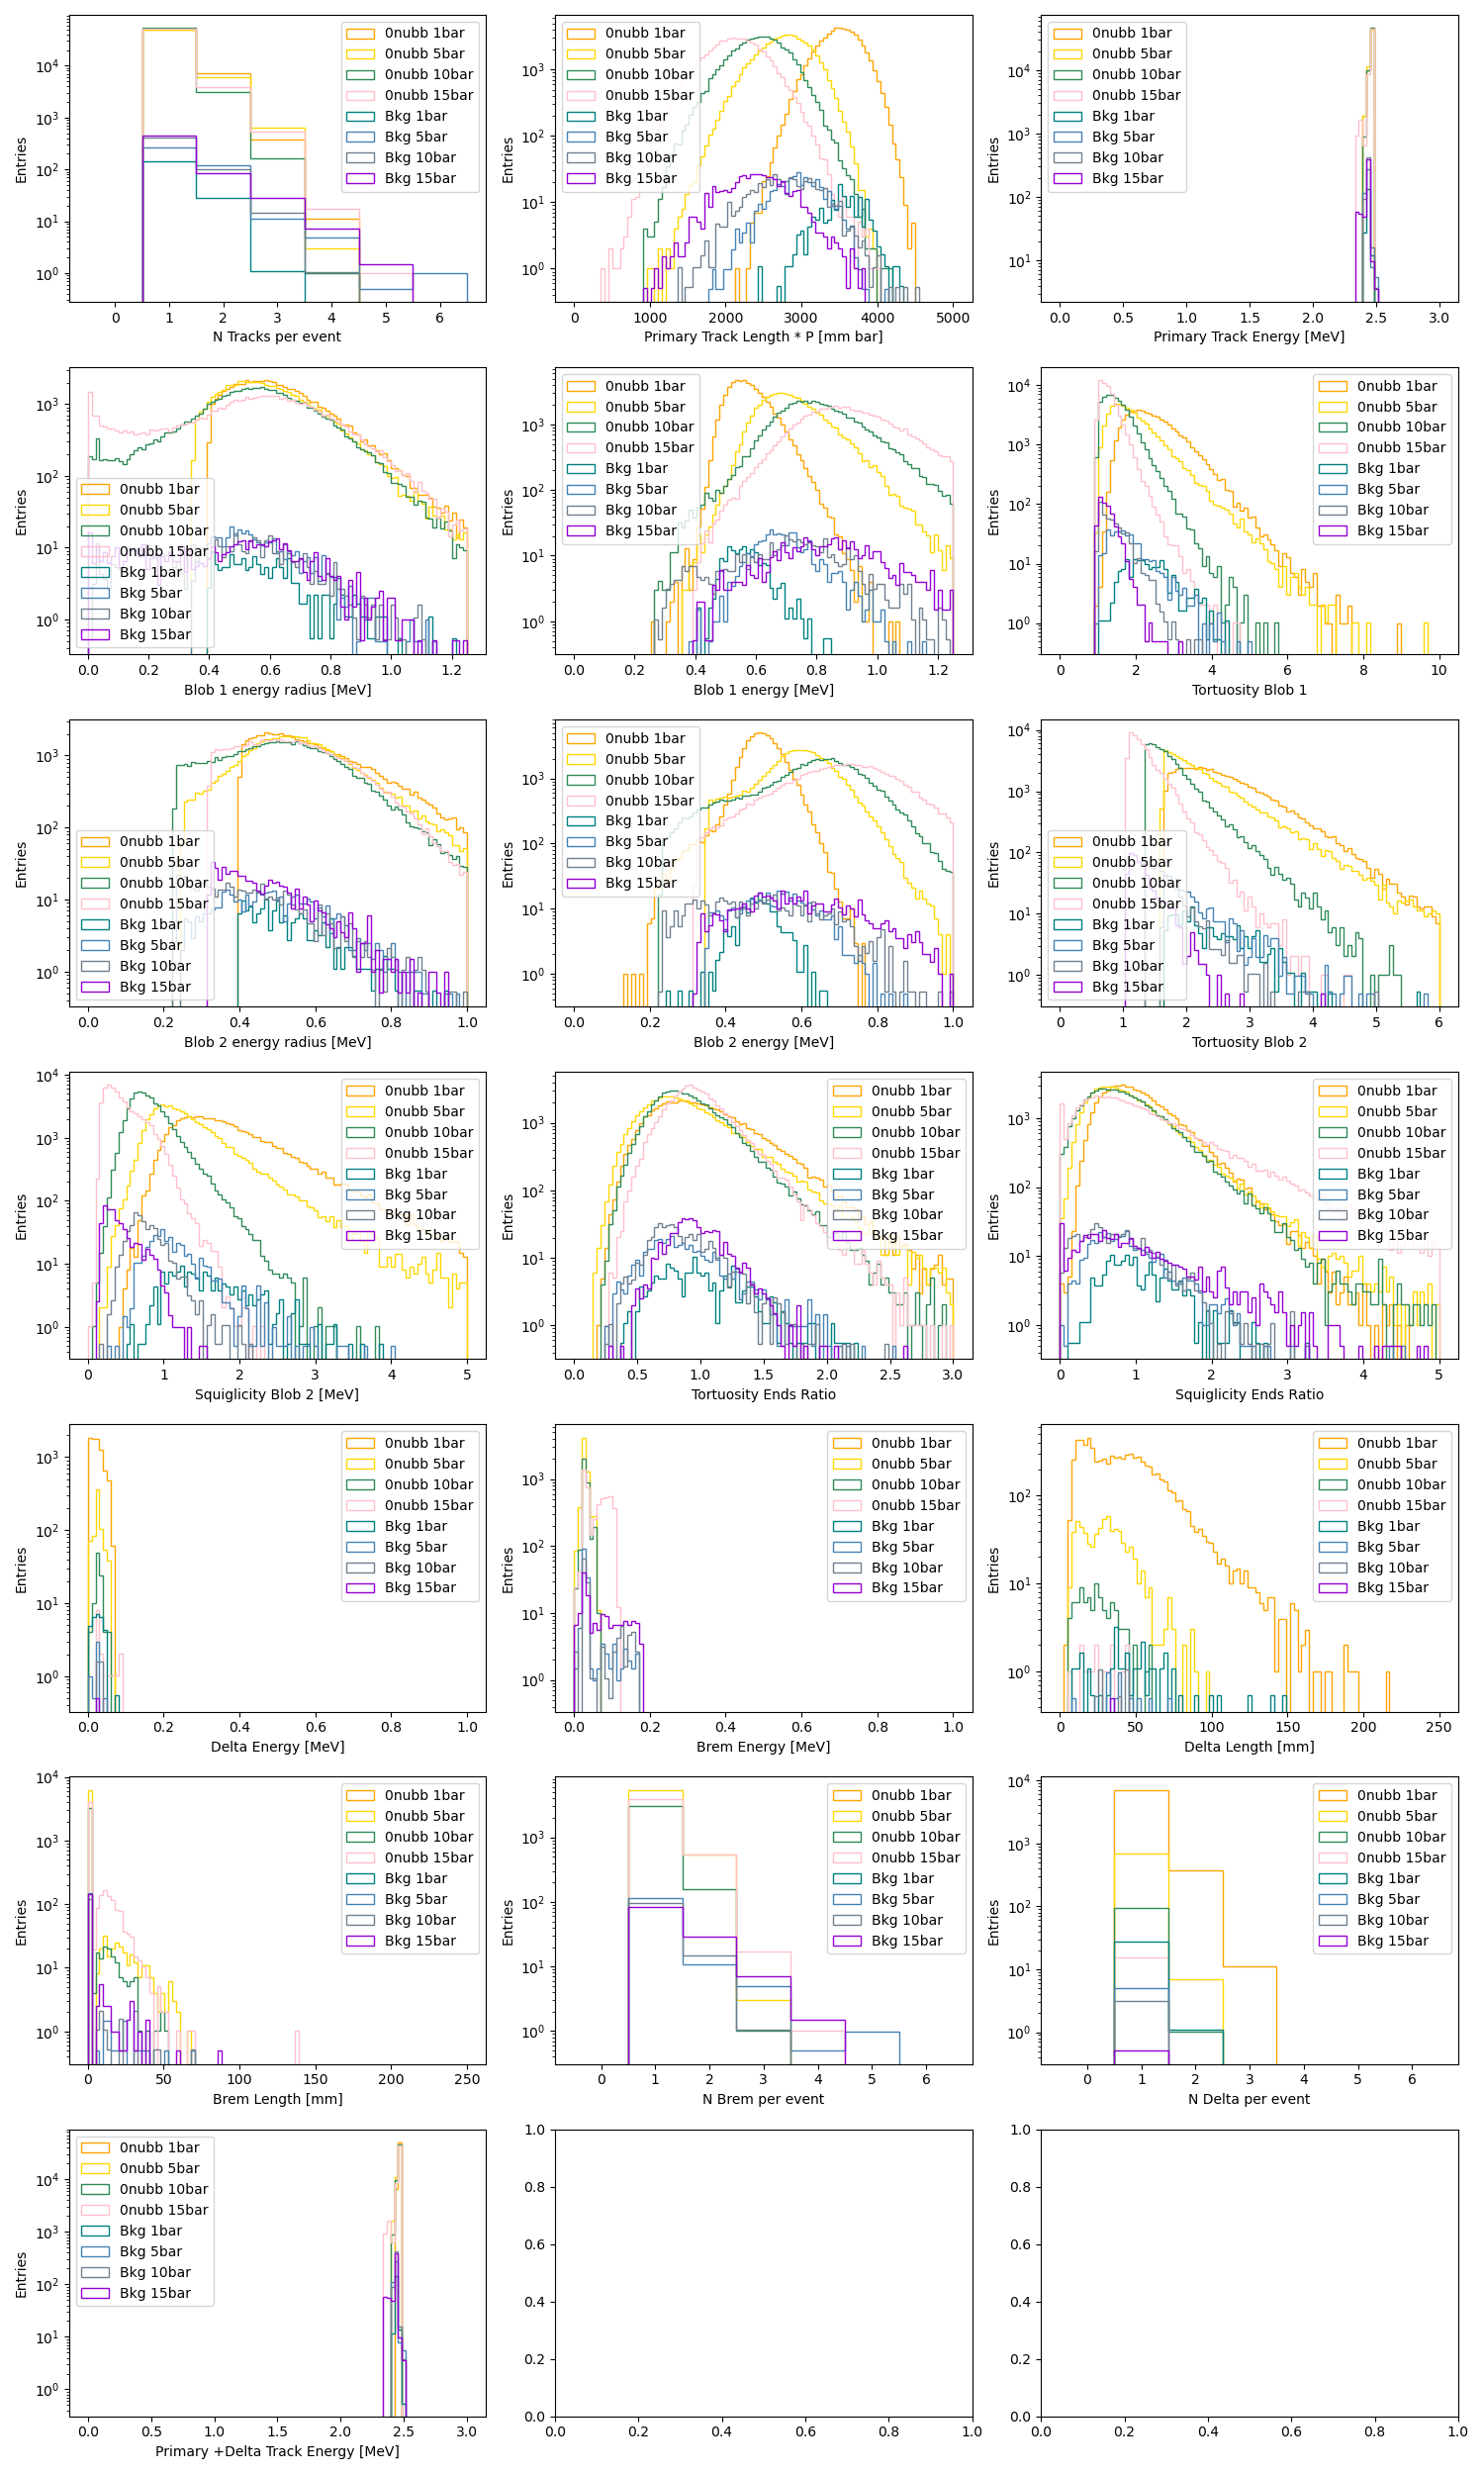

In [5]:
# Plot some variables like number of tracks
%matplotlib widget

def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label):
    efficiency = n/N
    error=np.sqrt( (efficiency/N) * (1-efficiency)  )

    if (label == "Bkg"):
        print(f"Bkg Rej: {label}:", round(100*efficiency, 2), "+/-", round(100*error,2),  "%", "     (bkg rej ==", round(100-100*efficiency,2), "%)")
    else:
        print(f"Efficiency {label}:",  round(100*efficiency, 2), " +/-", round(100*error,2),  "%")

    return efficiency, error


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary

def ApplyDeltaLenCut(df_meta, df_primary, cut_delta):

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.length > cut_delta] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]

    return df_meta, df_primary

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values

# Cut out events with Brem in the name
def ApplyNTracksLenCut(df_meta, df_primary, keep_xrays):

    brems  = GetBrems(df_meta)

    if (keep_xrays):
        brems = brems[ (brems.energy < 28e-3) & (brems.energy > 30e-3) ] # these are events to cut

    df_meta    = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    return df_meta, df_primary


def ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ):

    cuts = []

    # 1 bar
    if (pressure == 1):
       
       # 1bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 0.175, 2.5)
                df_meta, df_primary = ApplyDeltaLenCut(df_meta,df_primary, 80)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.337) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.1) & (df_primary.Tortuosity1 > 1.1)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.3, 0.3, 2.5)
                df_meta, df_primary = ApplyDeltaLenCut(df_meta,df_primary, 200)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1R > 0.25) & (df_primary.energy > 2.15) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.1)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary,3, 0.75, 2.5)
                cuts =  (df_primary.blob2R > 0.24) &  (df_primary.Tortuosity2 > 1.15) &  (df_primary.energy > 1.72) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyNTracksLenCut(df_meta, df_primary, False)
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.115, 0.15, 2.5)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 >1.66)

            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.115, 0.15, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1R > 0.25) & (df_primary.energy > 2.36) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.33) & (df_primary.blob1R > 0.3) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # 30% signal eff
            if (eff_targ == 30):
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.275) & (df_primary.blob1R > 0.28) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.08, 0.1, 2.5)
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.38)     & (df_primary.blob1R > 0.44) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5) & (df_primary.Tortuosity1 > 1.6)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.375) & (df_primary.blob2 > 0.375) & (df_primary.blob1R > 0.375) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.23) & (df_primary.blob1R > 0.23) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1 > 0.35) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.65)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.25) & (df_primary.Tortuosity1 > 1.25)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1R > 0.35) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.63)

            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.12)
            
            # 90% signal eff
            elif (eff_targ == 90):
                cuts =  (df_primary.blob2R > 0.16) & (df_primary.blob1R > 0.16) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.27) & (df_primary.Tortuosity1 > 1.25)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.125, 3, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.15) & (df_primary.blob1 > 0.15) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.02)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.23) & (df_primary.blob2 > 0.23) & (df_primary.blob1 > 0.23) & (df_primary.energy > 2.4) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.34)

            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.125, 3, 2.5)
                cuts = (df_primary.blob2R > 0.21) & (df_primary.blob2 > 0.15) & (df_primary.blob1 > 0.15) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.22, 3, 2.5)
                cuts = (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.15)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3,2.5)
                cuts =  (df_primary.blob2R > 0.17) & (df_primary.blob1R > 0.17) & (df_primary.energy > 0) & (df_primary.energy < 2.5)
            else:
                print("Unknown efficiency target specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.07)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3, 2.5)
                cuts = (df_primary.blob2R > 0.205) & (df_primary.blob2 > 0.2) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2) & (df_primary.energy < 2.5)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.22, 3, 2.5)
                cuts =  (df_primary.energy > 1.5) & (df_primary.energy < 2.5)
        
        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts

def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, eff_targ, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Targ efficiency:", eff_targ, "%")

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    scale = 0
    if pressure == 1:
        scale = 0
    elif pressure == 5:
        scale = 0
    elif pressure == 10:
        scale = 0
    elif pressure == 15:
        scale = 0

    
    axs[0,1].hist(df_primary.length*pressure+scale, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length * P [mm bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return len(df_primary.event_id.unique())

fig, axs = plt.subplots(7, 3, figsize=(15, 25))
num_nubb_1bar_cut  = PlotDistributionswithCuts(nubb_meta_1bar,  "orange",   "0nubb 1bar",  1,  diff, 30,  sf_nubb_1bar)
num_nubb_5bar_cut  = PlotDistributionswithCuts(nubb_meta_5bar,  "gold",     "0nubb 5bar",  5,  diff, 30,  sf_nubb_5bar)
num_nubb_10bar_cut = PlotDistributionswithCuts(nubb_meta_10bar, "seagreen", "0nubb 10bar", 10, diff, 30,  sf_nubb_10bar)
num_nubb_15bar_cut = PlotDistributionswithCuts(nubb_meta_15bar, "Pink",     "0nubb 15bar", 15, diff, 30,  sf_nubb_15bar)

num_Bkg_1bar_cut  = PlotDistributionswithCuts(Bkg_meta_1bar,  "Teal",       "Bkg 1bar",  1,  diff, 30, sf_Bkg_1bar)
num_Bkg_5bar_cut  = PlotDistributionswithCuts(Bkg_meta_5bar,  "steelblue",  "Bkg 5bar",  5,  diff, 30, sf_Bkg_5bar)
num_Bkg_10bar_cut = PlotDistributionswithCuts(Bkg_meta_10bar, "slategray",  "Bkg 10bar", 10, diff, 30, sf_Bkg_10bar)
num_Bkg_15bar_cut = PlotDistributionswithCuts(Bkg_meta_15bar, "darkviolet", "Bkg 15bar", 15, diff, 30, sf_Bkg_15bar)


In [111]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, eff_targ):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())


On eff target: 30 %
On Pressure 1bar
Efficiency nubb: 30.71  +/- 0.11 %
Bkg Rej: Bkg: 0.09 +/- 0.01 %      (bkg rej == 99.91 %)
On Pressure 5bar
Efficiency nubb: 30.03  +/- 0.11 %
Bkg Rej: Bkg: 0.21 +/- 0.01 %      (bkg rej == 99.79 %)
On Pressure 10bar
Efficiency nubb: 30.28  +/- 0.11 %
Bkg Rej: Bkg: 0.28 +/- 0.01 %      (bkg rej == 99.72 %)
On Pressure 15bar
Efficiency nubb: 30.28  +/- 0.11 %
Bkg Rej: Bkg: 0.3 +/- 0.01 %      (bkg rej == 99.7 %)
FOM_err: [0.03537767 0.02292512 0.02000789 0.01938265]
On eff target: 60 %
On Pressure 1bar
Efficiency nubb: 60.48  +/- 0.11 %
Bkg Rej: Bkg: 0.86 +/- 0.02 %      (bkg rej == 99.14 %)
On Pressure 5bar
Efficiency nubb: 60.01  +/- 0.11 %
Bkg Rej: Bkg: 0.98 +/- 0.02 %      (bkg rej == 99.02 %)
On Pressure 10bar
Efficiency nubb: 60.14  +/- 0.11 %
Bkg Rej: Bkg: 1.34 +/- 0.02 %      (bkg rej == 98.66 %)
On Pressure 15bar
Efficiency nubb: 60.26  +/- 0.11 %
Bkg Rej: Bkg: 9.77 +/- 0.05 %      (bkg rej == 90.23 %)
FOM_err: [0.01214365 0.01149972 0.00982

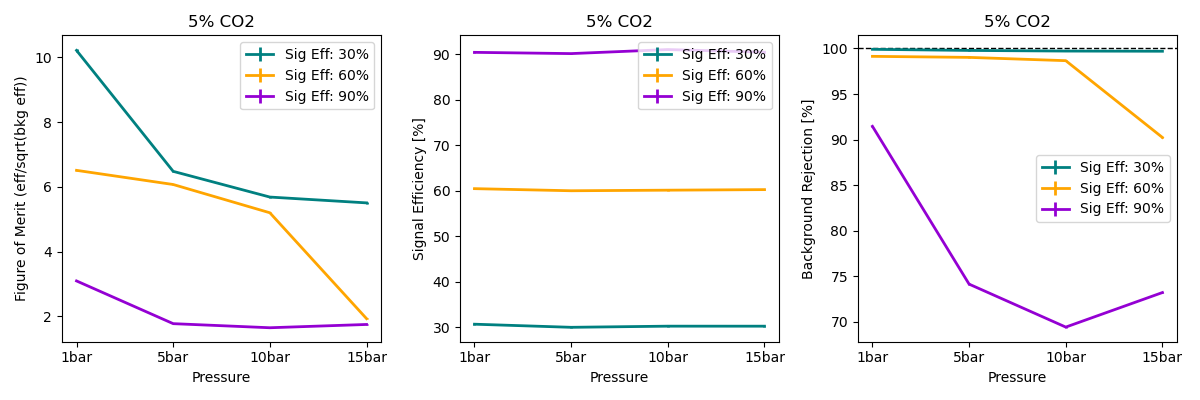

In [112]:
nubb_meta = [nubb_meta_1bar, nubb_meta_5bar, nubb_meta_10bar, nubb_meta_15bar]
Bkg_meta  = [Bkg_meta_1bar,  Bkg_meta_5bar,  Bkg_meta_10bar,  Bkg_meta_15bar]

num_nubb = [num_nubb_1bar, num_nubb_5bar, num_nubb_10bar, num_nubb_15bar]
num_Bkg  = [num_Bkg_1bar, num_Bkg_5bar, num_Bkg_10bar, num_Bkg_15bar]

cols = ["Teal", "Orange", "darkviolet"]
pressures_label = ["1bar", "5bar", "10bar", "15bar"]
pressures = [1, 5, 10, 15]


def Calc_FOM_err(fom, eff, eff_err, bkg, bkg_err):
    fom = np.array(fom)
    eff = np.array(eff)
    eff_err = np.array(eff_err)
    bkg = np.array(bkg)
    bkg_err = np.array(bkg_err)

    return fom*np.sqrt( (eff_err/eff)**2 + 0.25*(bkg_err/bkg)**2)


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for e, efficiency in enumerate([30, 60, 90]):
    print("On eff target:", efficiency, "%")

    fom = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Pressure", pressures_label[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diff, efficiency)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diff, efficiency)
        
        fom.append(FOM(nubb_cut  / num_nubb[index],  Bkg_cut  / num_Bkg[index]))
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb")
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg")
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

    fom_err = Calc_FOM_err(fom, eff, eff_err, Bkg_eff, Bkg_err)
    print("FOM_err:", fom_err)

    axs[0].errorbar(pressures_label, fom, fom_err, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[0].set_xlabel("Pressure")
    axs[0].set_ylabel("Figure of Merit (eff/sqrt(bkg eff))")

    axs[1].errorbar(pressures_label, eff, eff_err, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[1].set_xlabel("Pressure")
    axs[1].set_ylabel("Signal Efficiency [%]")

    axs[2].errorbar(pressures_label, Bkg_eff, Bkg_err, color=cols[e], linewidth = 2, label =f"Sig Eff: {efficiency}%")
    axs[2].set_xlabel("Pressure")
    axs[2].set_ylabel("Background Rejection [%]")


axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

if (diff == "nodiff"):
    axs[0].set_title(f"No Diffusion")
    axs[1].set_title(f"No Diffusion")
    axs[2].set_title(f"No Diffusion")
else:
    axs[0].set_title(f"5% CO2")
    axs[1].set_title(f"5% CO2")
    axs[2].set_title(f"5% CO2")

plt.tight_layout()


